In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
data = pd.read_csv('/content/drive/MyDrive/datasets/mobile_price_classification.csv')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
data.shape

(2000, 21)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

In [6]:
data.isna().sum()

battery_power     0
bluetooth         0
clock_speed       0
dual_sim          0
front_cam         0
4G                0
int_memory        0
m_dep             0
mobile_wt         0
n_cores           0
primary_camera    0
px_height         0
px_width          0
ram               0
sc_h              0
sc_w              0
talk_time         0
three_g           0
touch_screen      0
wifi              0
price_range       0
dtype: int64

In [7]:
data.columns

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_cam',
       '4G', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'primary_camera',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [8]:
data.price_range.unique()

array([1, 2, 3, 0])

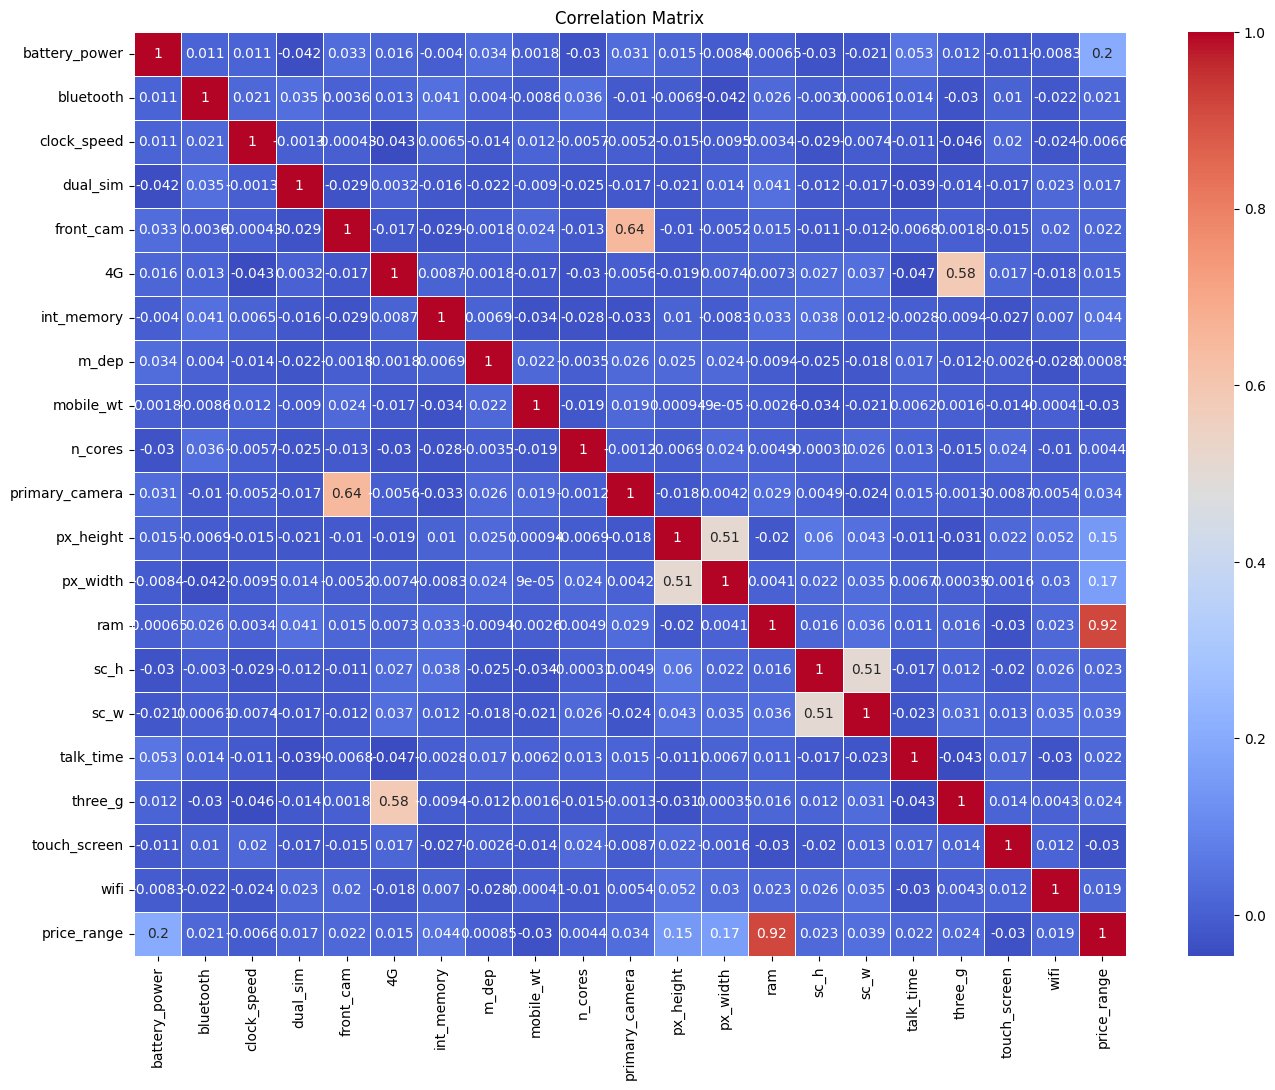

In [9]:
plt.figure(figsize=(16, 12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [10]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
bluetooth,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
front_cam,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
4G,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [49]:
x = data.iloc[:,0:20]
y = data.iloc[:,20]

In [62]:
def create_model(optimizer='adam'):

  model = Sequential()
  model.add(Dense(64, activation='relu', input_shape=(20,)))
  model.add(Dense(len(set(data['price_range'])), activation='linear'))

  model.compile(loss='binary_crossentropy',optimizer = optimizer,metrics = ['accuracy'])
  return model

In [46]:
!pip install scikeras
from scikeras.wrappers import KerasClassifier

In [63]:
model = KerasClassifier(model = create_model, batch_size = 16 , verbose = 0)

In [60]:
optimizer = ['SGD',  'Adam', 'Adamax', 'Nadam']
epochs = [10,20,30]
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(model__optimizer=optimizer, optimizer__learning_rate=learn_rate,epochs=epochs)

In [64]:
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=3, n_jobs=-1, error_score='raise')
random_search.fit(x,y)

RandomizedSearchCV(cv=3, error_score='raise',
                   estimator=KerasClassifier(batch_size=16, model=<function create_model at 0x7af207fdd090>, verbose=0),
                   n_jobs=-1,
                   param_distributions={'epochs': [10, 20, 30],
                                        'model__optimizer': ['SGD', 'Adam',
                                                             'Adamax',
                                                             'Nadam'],
                                        'optimizer__learning_rate': [0.001,
                                                                     0.01, 0.1,
                                                                     0.2,
                                                                     0.3]})

In [67]:
random_search.best_params_

{'optimizer__learning_rate': 0.001, 'model__optimizer': 'Adamax', 'epochs': 10}

In [68]:
random_search.best_score_

0.2779871325598462

In [78]:
best_model = random_search.best_estimator_

In [80]:
best_model.fit(x,y)

KerasClassifier(
	model=<function create_model at 0x7af207fdd090>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=16
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	optimizer__learning_rate=0.001
	model__optimizer=Adamax
	class_weight=None
)

In [86]:
new_data = ['1949', '0', '2.6', '1', '4', '0', '47', '0.3', '199', '4', '7', '407', '822', '1433', '11', '5', '20', '0', '0', '1']
new_data = [float(value) for value in new_data]

In [87]:
prediction = best_model.predict([new_data])[0]

print(f"Predicted price range: {prediction}")

Predicted price range: 2
